# Problem 2

In this Jupyter notebook, we visualize how HMMs work. This visualization corresponds to problem 2 in set 6.

Assuming your HMM module is complete and saved at the correct location, you can simply run all cells in the notebook without modification.

In [1]:
import re
import os
import numpy as np
import random
from IPython.display import HTML

from HMM_Rhyme import unsupervised_HMM
from HMM_helper_Rhyme import (
    text_to_wordcloud,
    states_to_wordclouds,
    create_rhymes,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission,
)

## Visualization of the dataset

We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:

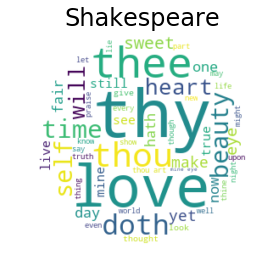

In [2]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [3]:
obs, obs_map = parse_observations(text)
Rhyme_counter, Rhyme_map = create_rhymes(text, obs_map)
hmm8 = unsupervised_HMM(obs, 2, 1)

## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

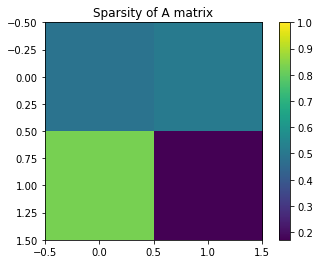

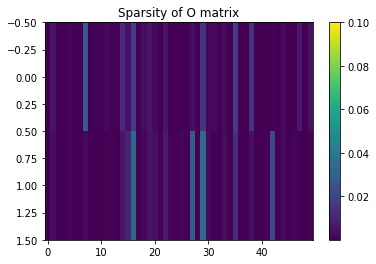

In [4]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence

As you have already seen, an HMM can be used to generate sample sequences based on the given dataset. Run the cell below to show a sample sentence based on the Constitution.

In [5]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, Rhyme_map, Rhyme_counter, n_words=25, map_index=1, map_part=1, punc='...'))

Sample Sentence:
So thereof and tomorrow why permit false other the live till saucy of my a me thou a disgrace are time selfexample mortal a memory...


## Part H: Using varying numbers of hidden states

Using different numbers of hidden states can lead to different behaviours in the HMMs. Below, we train several HMMs with 1, 2, 4, and 16 hidden states, respectively. What do you notice about their emissions? How do these emissions compare to the emission above?

In [6]:
def gen_basic_sonnet(hmm, obs_map, Rhyme_map, Rhyme_counter):
    lst = [0] * 14
    part = [0] * 14
    lst1 = [0, 1, 4, 5, 8, 9, 12]
    lst2 = [2, 3, 6, 7, 10, 11, 13]
    for i in range(7):
        word = np.random.choice(list(range(Rhyme_counter)))
        lst[lst1[i]] = word
        lst[lst2[i]] = word
        if (random.random < 0.5):
            part[lst1[i]] = 0
            part[lst2[i]] = 1
        else:
            part[lst1[i]] = 1
            part[lst2[i]] = 0
    
    for i in range(13):
        print(sample_sentence(hmm, obs_map, Rhyme_map, Rhyme_counter, n_words=8, map_index=lst[i], map_part=part[i]))
    
    print(sample_sentence(hmm, obs_map, Rhyme_map, Rhyme_counter, n_words=8, map_index=lst[i+1], map_part=part[i+1], punc='.'))

In [7]:
hmm1 = unsupervised_HMM(obs, 1, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm1, obs_map, Rhyme_map, Rhyme_counter, n_words=25))


Sample Sentence:
That clean reigns what increase than lilys worthy my nor of eyes deserves where conceit thou them not same unkind will eyes it the mar,


In [8]:
gen_basic_sonnet(hmm1, obs_map, Rhyme_map, Rhyme_counter)

Again thee cheek dedicated fast me full thee,
In fair i is dead to present memory,
Gravity fight debtor with him longer when be,
Bestow mine for or and many o die,
Gold that do outward love is the decease,
You and man sick i fools it lies,
Lies but grow nor consumst for and increase,
Is some a yet for some others eyes,
Wrinkle glowing do known so not a memory,
Leaped when upon thou too world a decease,
But or have thou altered give to die,
Starved more with even then this woe increase,
To being come unrest his my self lies,
From i a palate simple mens as eyes.


In [9]:
hmm2 = unsupervised_HMM(obs, 2, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm2, obs_map, Rhyme_map, Rhyme_counter, n_words=25, punc='...'))


Sample Sentence:
Not 95 pent your art but blessed thy in are selfs common beauty and me the mightier my space girded of eye cry hate 22...


In [10]:
gen_basic_sonnet(hmm2, obs_map, Rhyme_map, Rhyme_counter)

Simple and so this above gave with content,
Thee so pay receives by me makes decease,
Death left me thy nerves vilest confine ornament,
Say dissuade glass to me love good increase,
Weed canst sap roses doth exchequer the thee,
Doting it souls presage my thy remove lies,
Breathers eyelids grieved creation the laid my be,
Blessing what not in of in copy eyes,
Cupid besiege therefore streams desperate most flies lies,
Sometime fly is runs lose pleasure on niggarding,
Past graces afterwards bloody him you then eyes,
Single of thou fair saw greater eye spring,
My touches slight world with then the content,
Angel spendst broken me which of bent ornament.


In [11]:
hmm4 = unsupervised_HMM(obs, 4, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm4, obs_map, Rhyme_map, Rhyme_counter, n_words=25, punc='...'))


Sample Sentence:
Ill for knowing this i waste thou before own heats with be go then wert her stay charactered an said poor enemies only no strongly...


In [12]:
gen_basic_sonnet(hmm4, obs_map, Rhyme_map, Rhyme_counter)

Eye breast in thy eyes fair would lies,
The and their blazon truth expense tables content,
That hast and he sun leaving doth eyes,
That by whos for whom against on ornament,
Or dear write should know which sense niggarding,
With on renewed so fresh when have decease,
And hate wasted rearward be trespass by spring,
Mine grow my second his removed catch increase,
Is th record his control love in lies,
Hungry good account glory loud thou will decease,
Praise good their amends beast kill hate eyes,
Old strangle as advance tis a memory increase,
Make gainst th distilled self and she content,
Me sake to thee that for a ornament.


In [13]:
hmm16 = unsupervised_HMM(obs, 16, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm16, obs_map, Rhyme_map, Rhyme_counter, n_words=25, pun='...'))

KeyboardInterrupt: 

In [ ]:
gen_basic_sonnet(hmm16, obs_map, Rhyme_map, Rhyme_counter)

## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

In [ ]:
wordclouds = states_to_wordclouds(hmm16, obs_map, Rhyme_map, Rhyme_counter)

## Visualizing the process of an HMM generating an emission

The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.

In [ ]:
anim = animate_emission(hmm16, obs_map, Rhyme_map, Rhyme_counter, M=16)
HTML(anim.to_html5_video())